# ESILV - Python for data analysis - project 2023

Group composition : Christopher MUFU, Weize YAN, Audrey DJOUPE PENE

## Description of the dataset selected (Online News Popularity)

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the popularity (number of shares) of articles in social networks. 

## Summary

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Load the necessary packages

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import copy

# I) Data Cleaning / Pre-processing

- Extraction of the dataset
- Quick analysis of the dataset
- Removing rows
- Removing columns
- Transformation / Merge of some columns
- Study of the target 


### 1) Extraction of the dataset

In [47]:
df = pd.read_csv("OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### 2) Quick analysis of dataset

In [48]:
df.shape

(39644, 61)

In [49]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [50]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [51]:
#df=df.drop_duplicates()
#df.shape
# There are no duplicates

In [52]:
df.isnull().sum()
# There are no missing values

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

### 3) Removing rows 

In [53]:
# Remove spaces in columns
df.columns = [x.replace(" ", "") for x in list(df.columns)]
df.columns 

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [54]:
# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('Number of news with no words',num_of_nowords.size)


# Drop these items or rows with n_tokens_content = 0
df = df[df['n_tokens_content'] != 0]

Number of news with no words 1181


In [55]:
# Remove outliers CF II) Data visualization

### 4) Removing columns

In [56]:
# we remove the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(columns=['url','timedelta'], axis=1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [57]:
# analyze highly correlated features
# we find some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.
cor_matrix = df.corr().abs()


# Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. 
# So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. 
# So we are selecting the upper traingular.
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)


                               n_tokens_title  n_tokens_content  \
n_tokens_title                            NaN          0.028124   
n_tokens_content                          NaN               NaN   
n_unique_tokens                           NaN               NaN   
n_non_stop_words                          NaN               NaN   
n_non_stop_unique_tokens                  NaN               NaN   
num_hrefs                                 NaN               NaN   
num_self_hrefs                            NaN               NaN   
num_imgs                                  NaN               NaN   
num_videos                                NaN               NaN   
average_token_length                      NaN               NaN   
num_keywords                              NaN               NaN   
data_channel_is_lifestyle                 NaN               NaN   
data_channel_is_entertainment             NaN               NaN   
data_channel_is_bus                       NaN               Na

In [58]:
# So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min', 'rate_negative_words']


In [59]:
# df.drop(df.columns[to_drop], axis=1) ne marche pas
df.drop(columns=['n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min', 'rate_negative_words'], axis=1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### 5) Transformation (merge) of some columns

In [60]:
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
publish_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            publish_arr.append('Sunday')      

In [61]:
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]

DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [62]:
# We cannot transform the variables : LDA_01, LDA_02, LDA_03,LDA_04, because they contain continuous values.
df.loc[:,"LDA_00"]

0        0.500331
1        0.799756
2        0.217792
3        0.028573
4        0.028633
           ...   
39639    0.025038
39640    0.029349
39641    0.159004
39642    0.040004
39643    0.050001
Name: LDA_00, Length: 38463, dtype: float64

In [63]:
df.insert(loc=11, column='weekdays', value=publish_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now I drop the old data
df.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus', 'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'weekdays', 'data_channel', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

In [64]:
df.shape

(38463, 44)

### 6) Study of target variable :  Shares 

In [65]:
# quartiles
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [66]:
# quintiles
#print(df_target.quantile(0.20),df_target.quantile(0.40),df_target.quantile(0.60),df_target.quantile(0.80))

In [67]:
# We have decided to use quartiles to determine our category criteria :

share_label = list()
for shares in df['shares'] :
    
    if shares <= 1400: # <25% 
        share_label.append('Unpopular')
    else: # <50%
        share_label.append('Popular')
    

In [68]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,weekdays,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,Monday,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,Monday,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,Monday,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,Monday,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,Monday,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,Wednesday,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,Wednesday,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,Wednesday,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,Wednesday,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [69]:
popularity = pd.DataFrame(share_label, columns=['popularity'])
popularity.reset_index(drop=True, inplace=True)

In [70]:
df.reset_index(drop=True, inplace=True)

In [71]:
df = pd.concat([df, popularity], axis=1)
print(df.columns)
df.head()

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'weekdays', 'data_channel', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'popularity'],
      dtype='object')


,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,weekdays,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,Monday,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,Monday,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,Monday,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,Monday,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,Monday,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [72]:
df.dtypes # weekdays, data_channel and popularity are object type.

n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
num_hrefs                       float64
num_self_hrefs                  float64
num_imgs                        float64
num_videos                      float64
average_token_length            float64
num_keywords                    float64
weekdays                         object
data_channel                     object
kw_min_min                      float64
kw_max_min                      float64
kw_min_max                      float64
kw_max_max                      float64
kw_avg_max                      float64
kw_min_avg                      float64
kw_max_avg                      float64
kw_avg_avg                      float64
self_reference_min_shares       float64
self_reference_max_shares       float64
self_reference_avg_sharess      float64
is_weekend                      float64
LDA_00                          float64
LDA_01                          float64


In [73]:
#df['weekdays'] = df['weekdays'].astype('category')
#df['data_channel'] = df['data_channel'].astype('category')
#df['popularity'] = df['popularity'].astype('category')

In [74]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

#seed(1)
# normality test
stat, p = shapiro(df["shares"]) # shapiro(df_target)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.154, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\edupro\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [75]:
#applying log transformation Cf III) Modelling


# II) Data Exploratory Analysis

- Global analysis 
- Rank of important variables
- Remove outliers
- Analysis of important variables

### 1) Global analysis

#### Categorical variables analysis

Our categorical variables are : weekdays and data_channel

In [76]:
df["weekdays"].value_counts() / len(df)
weekdays_data = pd.DataFrame (df["weekdays"].value_counts() / len(df))
weekdays_list = [x[0] for x in np.array(weekdays_data)]
weekdays_list

[0.18732288173049425,
 0.18643891532121779,
 0.18334503288875023,
 0.168239606894938,
 0.14398252866391076,
 0.06907937498375062,
 0.06159165951693835]

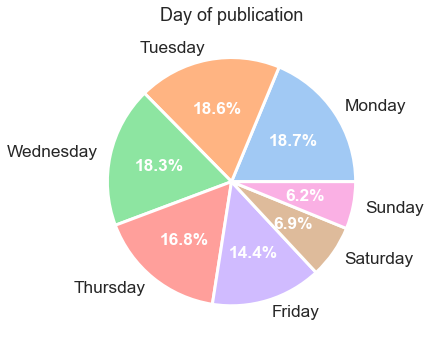

In [77]:
# Weekdays

x = weekdays_list
colors = sns.color_palette('pastel')[0:7]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    x, labels=labels, colors=colors, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Day of publication', fontsize=18)
plt.tight_layout()

Text(0.5, 0.98, 'Day of Publication')

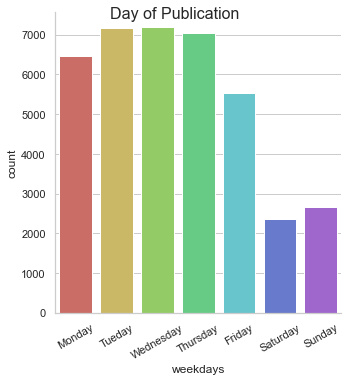

In [78]:
sns.set(rc={'figure.figsize':(11,11)})
sns.set(style="whitegrid")
ax= sns.catplot(x = "weekdays", kind = "count", data = df, order=['Monday', 'Tueday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'], palette = sns.color_palette("hls", 8))
ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Day of Publication', fontsize=16)

In [79]:
df["data_channel"].value_counts() / len(df)
datachannel_data = pd.DataFrame (df["data_channel"].value_counts() / len(df))
datachannel_list = [x[0] for x in np.array(datachannel_data)]
datachannel_list

[0.21235993032264774,
 0.19044276317499936,
 0.17824922652939187,
 0.16210384005407794,
 0.14276057509814627,
 0.06008371681876089,
 0.053999948001975925]

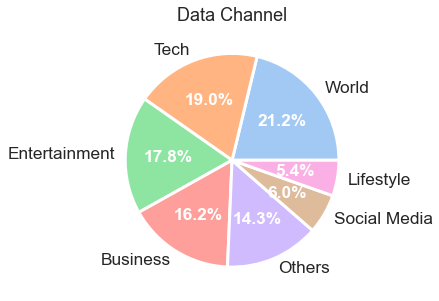

In [80]:
# Data_channel

x = datachannel_list
colors = sns.color_palette('pastel')[0:7]
labels = ['World', 'Tech', 'Entertainment', 'Business', 'Others','Social Media','Lifestyle']

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    x, labels=labels, colors=colors, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Data Channel', fontsize=18)
plt.tight_layout()

Text(0.5, 0.98, 'Data channel')

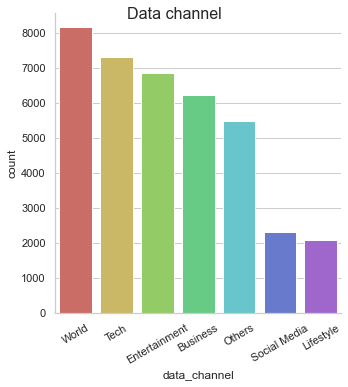

In [81]:
sns.set(rc={'figure.figsize':(11,11)})
sns.set(style="whitegrid")
ax= sns.catplot(x = "data_channel", kind = "count", data = df, order=['World', 'Tech', 'Entertainment', 'Business', 'Others','Social Media','Lifestyle'], palette = sns.color_palette("hls", 8))
ax.set_xticklabels(rotation=30)
ax.fig.suptitle('Data channel', fontsize=16)

#### Numerical variables analysis

Text(0.5, 1.0, 'Boxplots of number of words in the title')

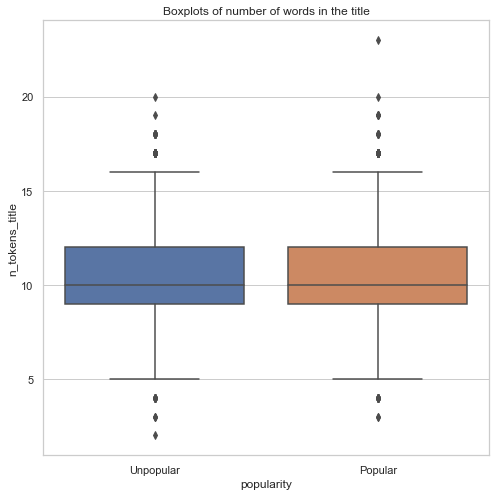

In [82]:
df['n_tokens_title'].describe()
# a lot of unique words, it is better to use a different plot from bar plots
# line plot
temp_data = df[df['n_tokens_title'] <= 100000]
fig, axes = plt.subplots(figsize=(8, 8))
# box plot
sns.boxplot(x='popularity', y='n_tokens_title', data=df, ax=axes)
plt.title('Boxplots of number of words in the title' )


we can say that there is no difference on the number of words in the title between the popular articles and the not popular articles.

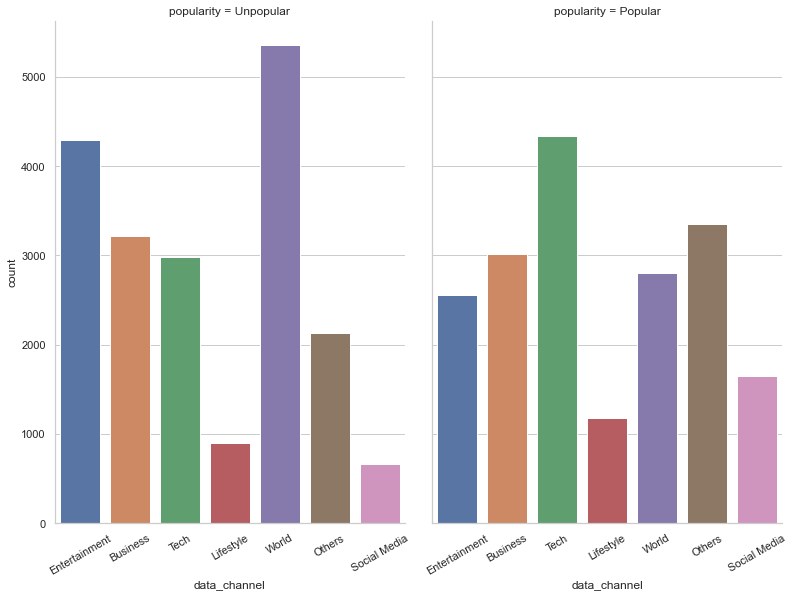

In [83]:
popularity_data = df[(df['popularity'] == 'Unpopular') | (df['popularity'] == 'Popular')]
ax = sns.catplot(x='data_channel', col="popularity", data=popularity_data, kind="count", height=8, aspect=.7)
ax.set_xticklabels(rotation=30)


Some of the popular articles topics are about technology, as opposed to the unpopular ones.

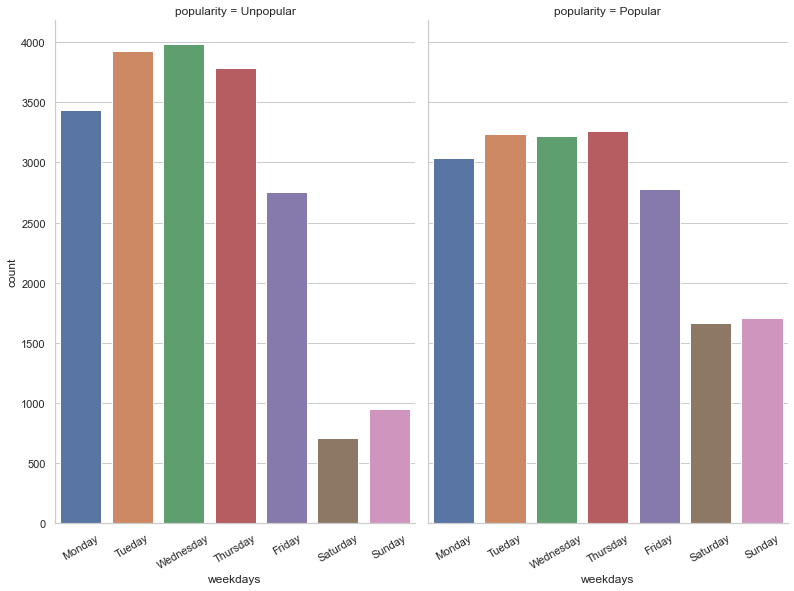

In [84]:
ax = sns.catplot(x='weekdays', col="popularity", data=popularity_data, kind="count", height=8, aspect=.7)
ax.set_xticklabels(rotation=30)

Here we can see that popular articles is published more often on weekends than unpopular articles.

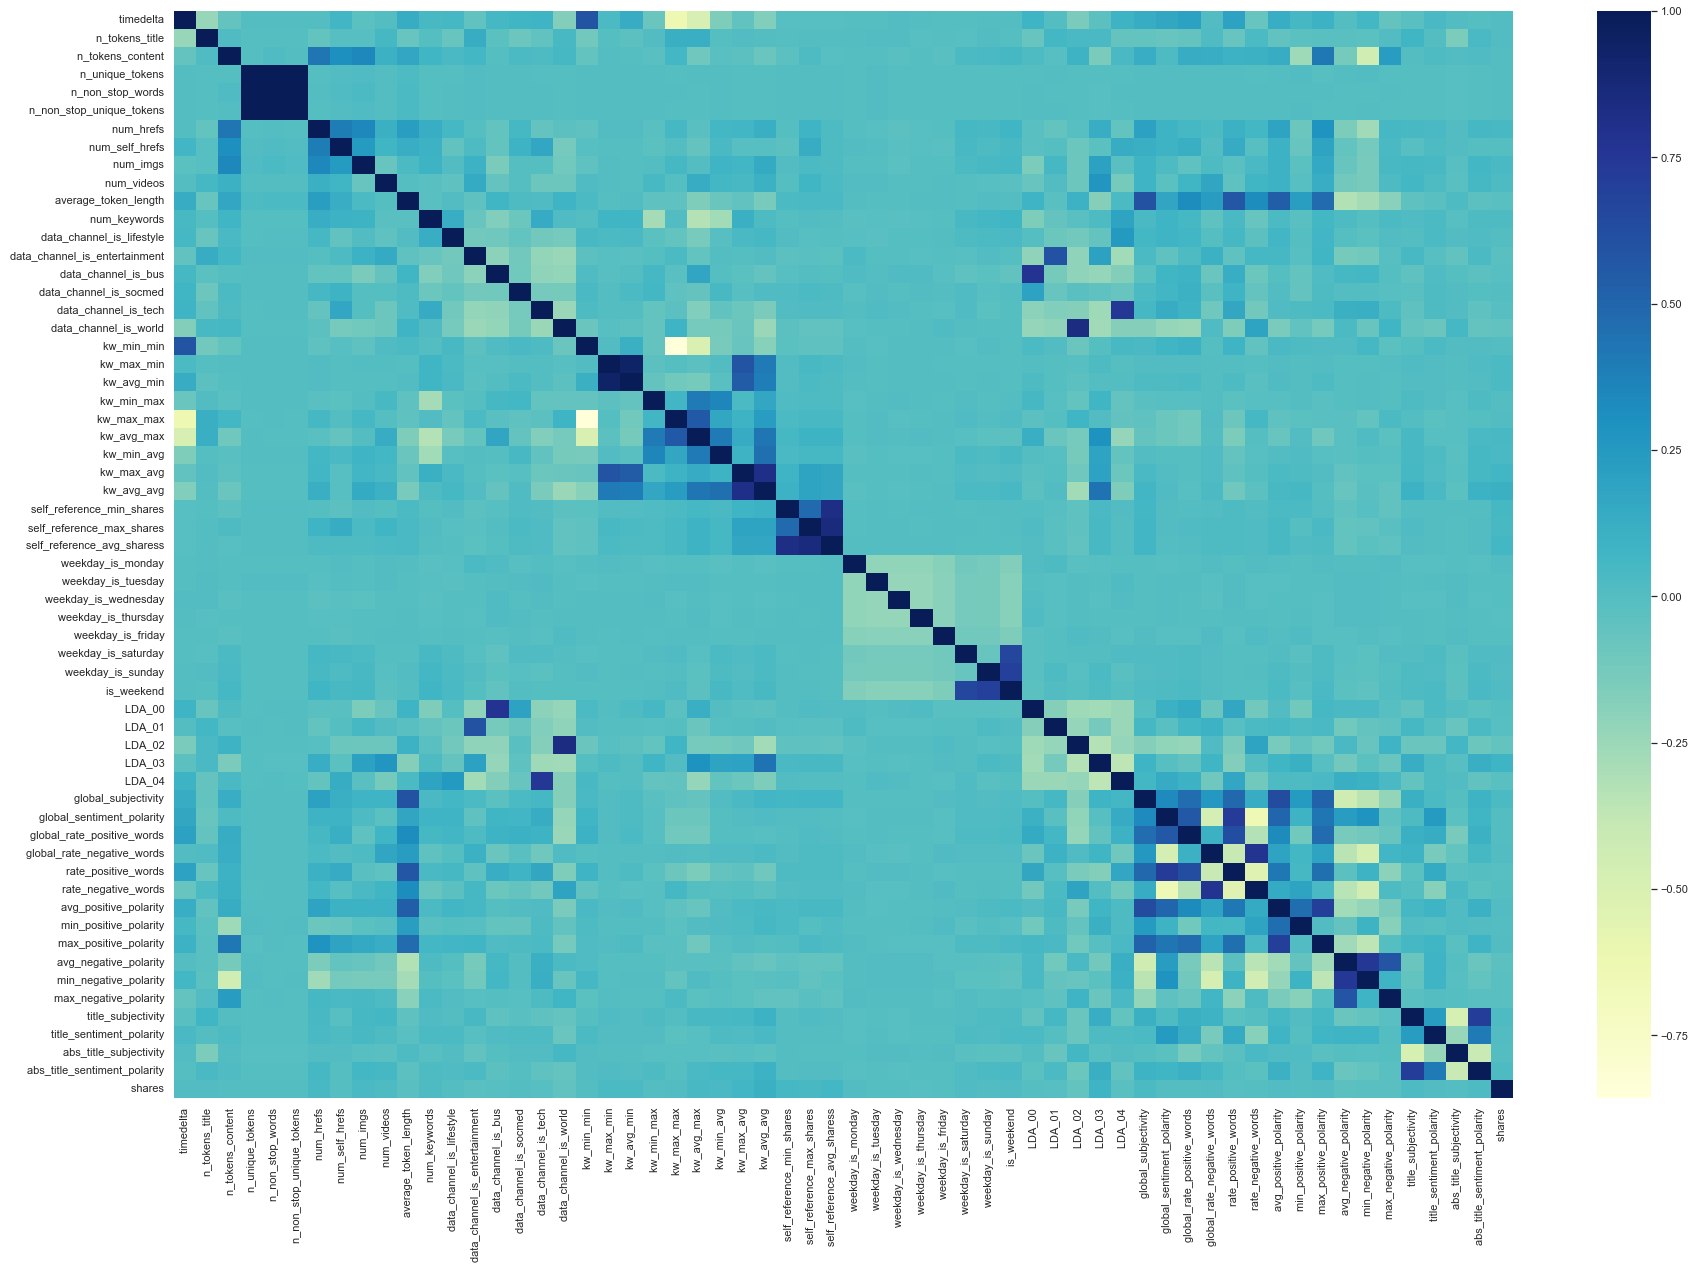

In [85]:
# Heatmap of linear correlation 
df_base = pd.read_csv("OnlineNewsPopularity.csv")

plt.figure(figsize=(30,20))
cor = df_base.corr(method ='pearson')
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

From the heatmap, we observe that the quantitative variables are not linearly correlated with Shares. However, it is possible that they have another non-linear relation with Shares. 

### 2) Rank of important variables 

In [86]:
!pip install xgboost

In [87]:
df_target = df["shares"]
df_target.head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [88]:
df_data = df.drop(['shares','weekdays','data_channel','popularity'],axis=1)
df_data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [89]:
df_data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,...,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,10.382419,563.295375,0.565049,11.217872,3.394769,4.563061,1.263786,4.687892,7.215012,26.708187,...,0.364689,0.098376,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930
std,2.113800,468.299538,3.573022,11.340580,3.869773,8.295365,4.164896,0.283231,1.916459,70.278215,...,0.085455,0.070382,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636
min,2.000000,18.000000,0.114964,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,259.000000,0.477419,5.000000,1.000000,1.000000,0.000000,4.496250,6.000000,-1.000000,...,0.311880,0.050000,0.600000,-0.331532,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,423.000000,0.542986,8.000000,3.000000,1.000000,0.000000,4.674121,7.000000,-1.000000,...,0.361872,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000
75%,12.000000,729.000000,0.611111,14.000000,4.000000,4.000000,1.000000,4.861901,9.000000,4.000000,...,0.413254,0.100000,1.000000,-0.193415,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,377.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


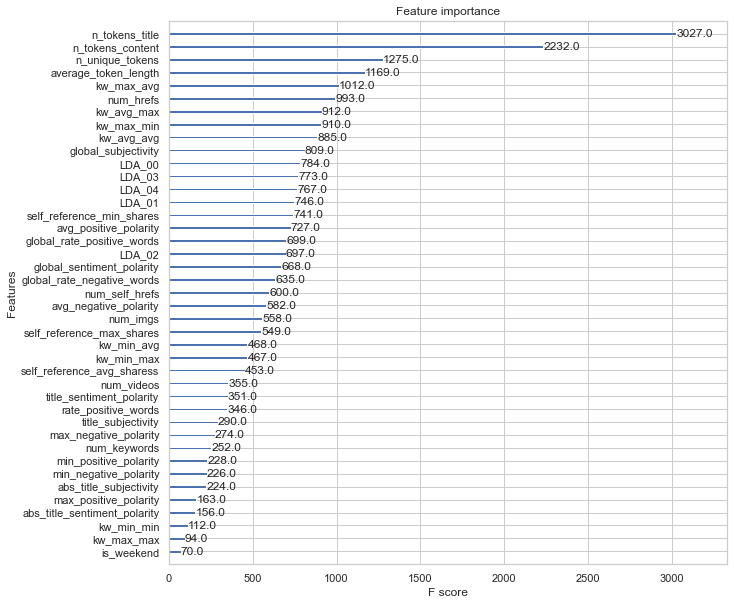

In [90]:
from xgboost import XGBRegressor
from xgboost import plot_importance

xgb = XGBRegressor(max_depth = 10,random_state = 42)
xgb.fit(df_data, df_target)
fig, ax = plt.subplots(1,1,figsize=(10,10))
impplot = plot_importance(xgb,ax = ax)
plt.show()

In [91]:
impfeats = [impplot.get_yticklabels()[::-1][i].get_text() for i in range(0,25)]
impfeats # we will use these variables to make the data visualization to see the link with shares 

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'average_token_length',
 'kw_max_avg',
 'num_hrefs',
 'kw_avg_max',
 'kw_max_min',
 'kw_avg_avg',
 'global_subjectivity',
 'LDA_00',
 'LDA_03',
 'LDA_04',
 'LDA_01',
 'self_reference_min_shares',
 'avg_positive_polarity',
 'global_rate_positive_words',
 'LDA_02',
 'global_sentiment_polarity',
 'global_rate_negative_words',
 'num_self_hrefs',
 'avg_negative_polarity',
 'num_imgs',
 'self_reference_max_shares',
 'kw_min_avg']

### 3) Remove outliers

In [92]:
# Check outliers using Interquartile Range (IQR)
Q1 = df[impfeats].quantile(0.25)
Q3 = df[impfeats].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_tokens_title                     3.000000
n_tokens_content                 470.000000
n_unique_tokens                    0.133692
average_token_length               0.365651
kw_max_avg                      2413.131307
num_hrefs                          9.000000
kw_avg_max                    155579.464285
kw_max_min                       555.000000
kw_avg_avg                      1176.711153
global_subjectivity                0.107848
LDA_00                             0.226874
LDA_03                             0.314880
LDA_04                             0.386012
LDA_01                             0.125680
self_reference_min_shares       1997.000000
avg_positive_polarity              0.101374
global_rate_positive_words         0.021262
LDA_02                             0.306450
global_sentiment_polarity          0.115522
global_rate_negative_words         0.011810
num_self_hrefs                     3.000000
avg_negative_polarity              0.138117
num_imgs                        

As we can see, there are a lot of outliers. 

In [93]:
df2 = df[~((df[impfeats] < (Q1 - 1.5 * IQR)) |(df[impfeats] > (Q3 + 1.5 * IQR))).any(axis=1)]

### 4) Analysis of important variables

a) n_tokens_title : Number of words in the title

In [94]:
def Uni_boxplot(var_name, df) :
    print(df[var_name].describe())
    # Boxplot 
    sns.set(style="darkgrid")
    plt.figure(figsize=(8,5))
    ax =sns.boxplot(y=var_name, 
                    data=df, 
                    showmeans=True,
                    meanprops={"marker":"o",
                           "markerfacecolor":"red", 
                           "markeredgecolor":"black",
                           "markersize":"10"},
                    palette="Blues")
    ax.set_title(var_name +' boxplot')
    plt.show()

In [95]:
def Uni_Histogram(var_name, df) :
    #Histogram 
    sns.set(style="whitegrid")
    # Creating distribution
    x = df[var_name]
    y = df[var_name].count()
    legend = ['distribution']

    # Creating histogram
    fig, axs = plt.subplots(1,1,figsize =(10, 5),tight_layout = True)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        axs.spines[s].set_visible(False)


    # Remove x, y ticks
    axs.xaxis.set_ticks_position('none')
    axs.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    axs.xaxis.set_tick_params(pad = 5)
    axs.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    axs.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.6)


    # Creating histogram
    N, bins, patches = axs.hist(x, bins = 10)

    # Setting color
    fracs = ((N**(1 / 5)) / N.max())
    norm = plt.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    # Adding extra features   
    plt.xlabel(var_name)
    plt.ylabel("Frequency")
    plt.legend(legend)
    plt.title('Histogram of ' + var_name)

    # Show plot

    plt.show()

count    38463.000000
mean        10.382419
std          2.113800
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64


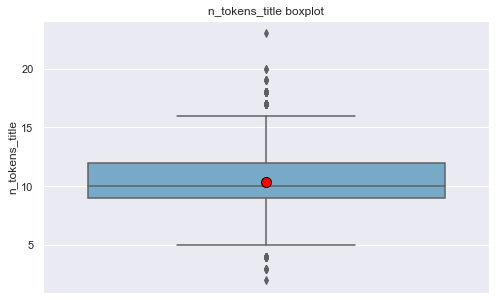

In [96]:
Uni_boxplot('n_tokens_title', df)

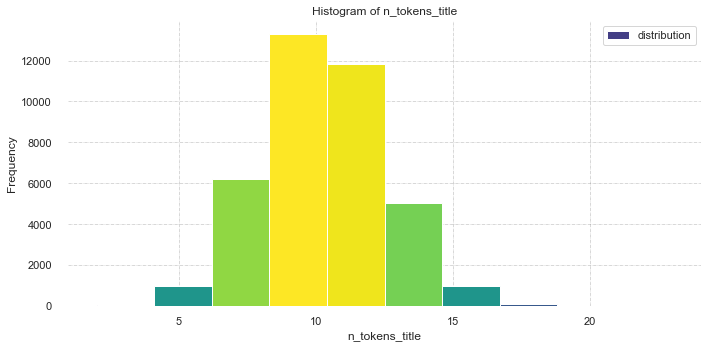

In [97]:
Uni_Histogram('n_tokens_title', df)

Here, we can see that most of the articles have between 10 and 12 words in their titles.

b) n_tokens_content : Number of words in the content

With outliers :

count    38463.000000
mean       563.295375
std        468.299538
min         18.000000
25%        259.000000
50%        423.000000
75%        729.000000
max       8474.000000
Name: n_tokens_content, dtype: float64


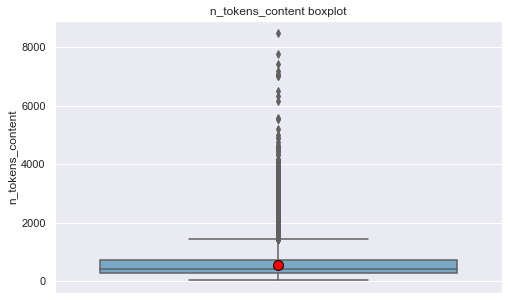

In [98]:
Uni_boxplot('n_tokens_content', df)

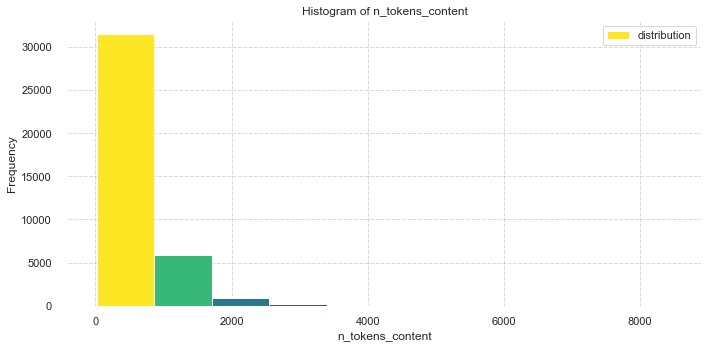

In [99]:
Uni_Histogram('n_tokens_content', df)

Without outliers :

count    9648.000000
mean      462.823383
std       278.650091
min        50.000000
25%       254.000000
50%       383.000000
75%       611.000000
max      1433.000000
Name: n_tokens_content, dtype: float64


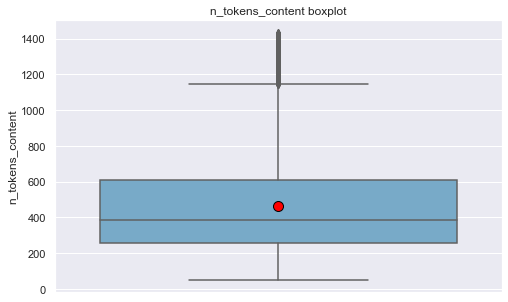

In [100]:
Uni_boxplot('n_tokens_content', df2)

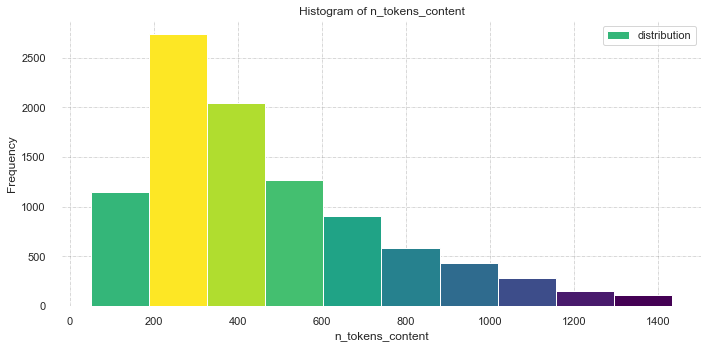

In [101]:
Uni_Histogram('n_tokens_content', df2)

We can notice that:
- There is a very big difference between the database without outliers and database with outliers.
- Looking at the charts with outliers, we saw that the thick boxplot near 0 is the box part of our box plot. Above the box and upper fence are some points showing outliers.
- Looking at the charts without outliers, we can say that most of articles have between 400 and 600 words in their articles.

(Same explanation for the rest of graphics)

c) average_token_length : Average length of the words in the content

count    38463.000000
mean         4.687892
std          0.283231
min          3.600000
25%          4.496250
50%          4.674121
75%          4.861901
max          8.041534
Name: average_token_length, dtype: float64


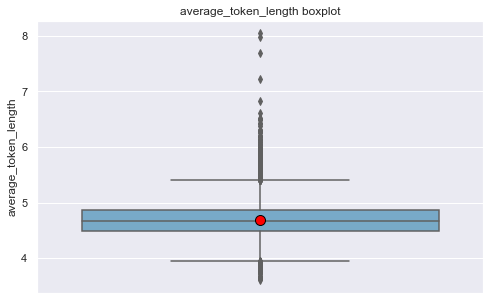

In [102]:
Uni_boxplot('average_token_length', df)

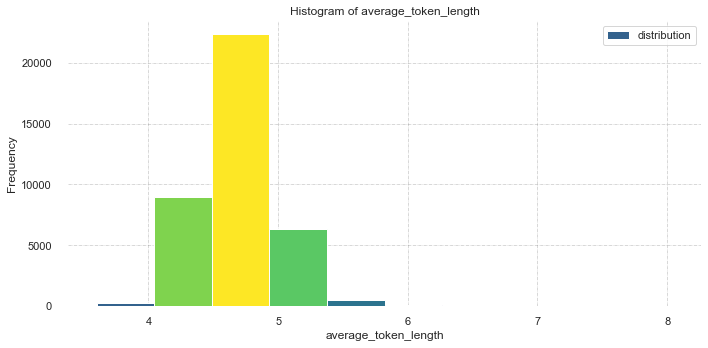

In [103]:
Uni_Histogram('average_token_length', df)

d) n_unique_tokens : Rate of unique words in the content

With outleirs :

count    38463.000000
mean         0.565049
std          3.573022
min          0.114964
25%          0.477419
50%          0.542986
75%          0.611111
max        701.000000
Name: n_unique_tokens, dtype: float64


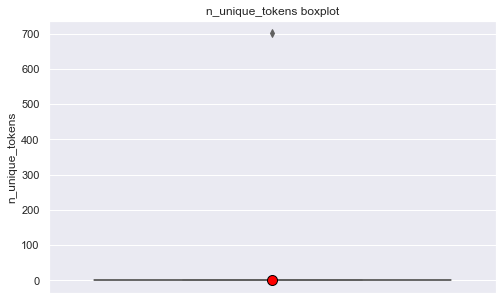

In [104]:
Uni_boxplot('n_unique_tokens', df)

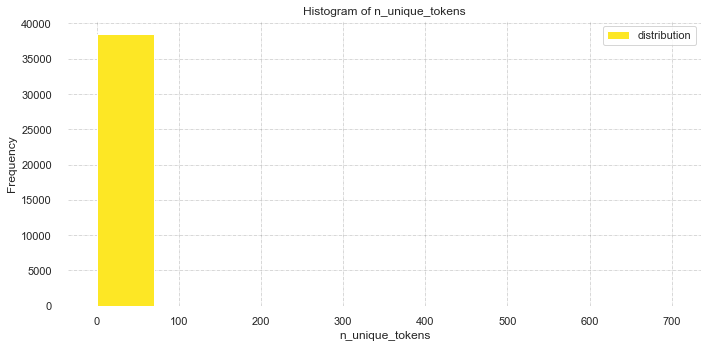

In [105]:
Uni_Histogram('n_unique_tokens', df)

Without outlier :

In [106]:
# Remove outlier 
print(np.where(df2['n_unique_tokens']>2))
df2 = df2[df2['n_unique_tokens'] < 2]
# We have observed that there is only one outlier, but that biaises our results.

(array([], dtype=int64),)


count    9648.000000
mean        0.557633
std         0.085648
min         0.306452
25%         0.496233
50%         0.554198
75%         0.613356
max         0.810526
Name: n_unique_tokens, dtype: float64


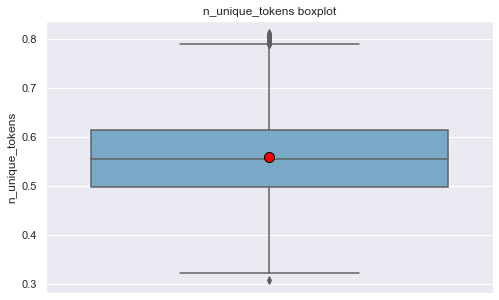

In [107]:
Uni_boxplot('n_unique_tokens', df2)

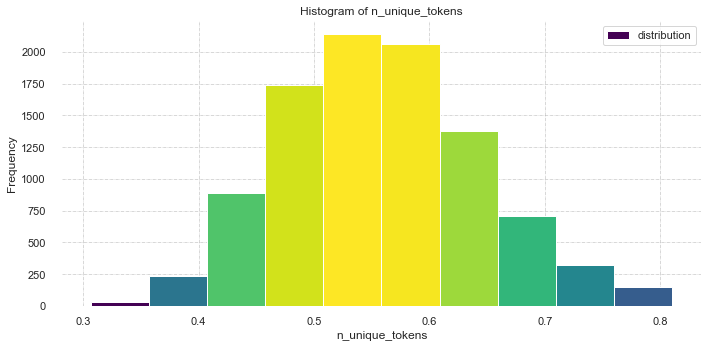

In [108]:
Uni_Histogram('n_unique_tokens', df2)

e) kw_max_min : Worst keyword (max. shares)

With outliers :

count     38463.000000
mean       1151.751079
std        3870.494630
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64


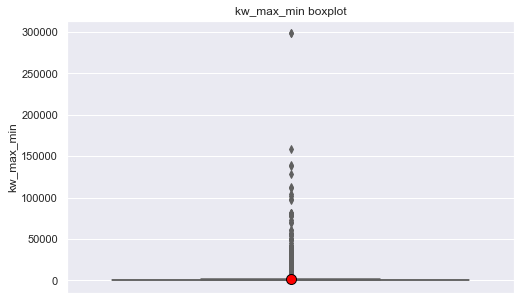

In [109]:
Uni_boxplot('kw_max_min', df)

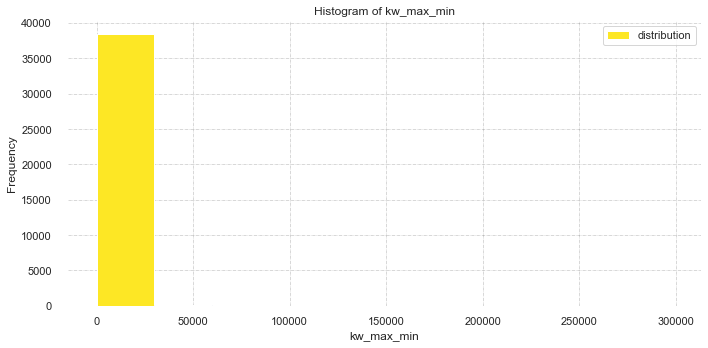

In [110]:
Uni_Histogram('kw_max_min', df)

Without outliers :

count    9648.000000
mean      701.353609
std       387.238888
min         0.000000
25%       442.000000
50%       634.000000
75%       921.000000
max      1800.000000
Name: kw_max_min, dtype: float64


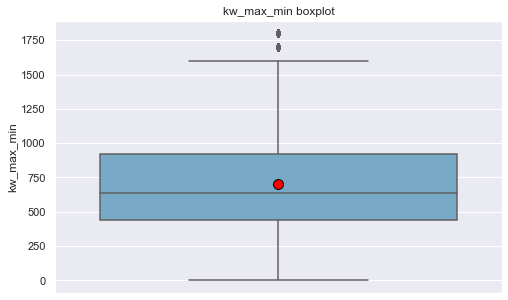

In [111]:
Uni_boxplot('kw_max_min', df2)

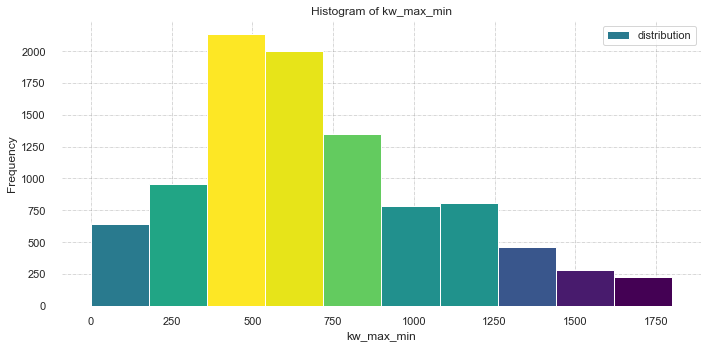

In [112]:
Uni_Histogram('kw_max_min', df2)

f) num_hrefs : Number of links

With outliers :

count    38463.000000
mean        11.217872
std         11.340580
min          0.000000
25%          5.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64


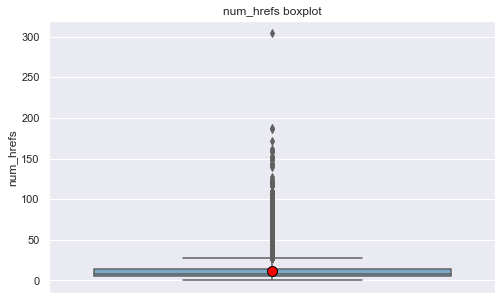

In [113]:
Uni_boxplot('num_hrefs', df)

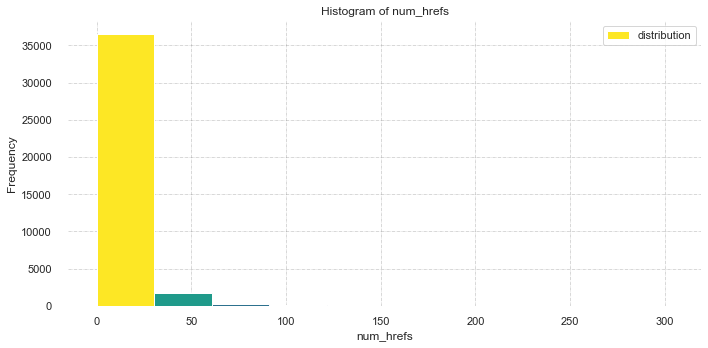

In [114]:
Uni_Histogram('num_hrefs', df)

Without outliers :

count    9648.000000
mean        7.885158
std         4.779547
min         0.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        27.000000
Name: num_hrefs, dtype: float64


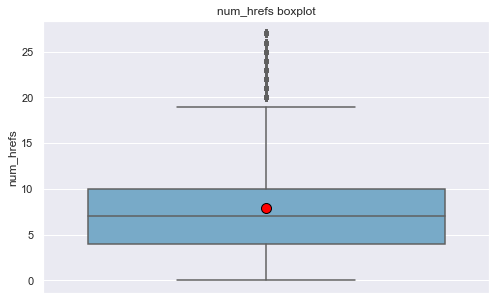

In [115]:
Uni_boxplot('num_hrefs', df2)

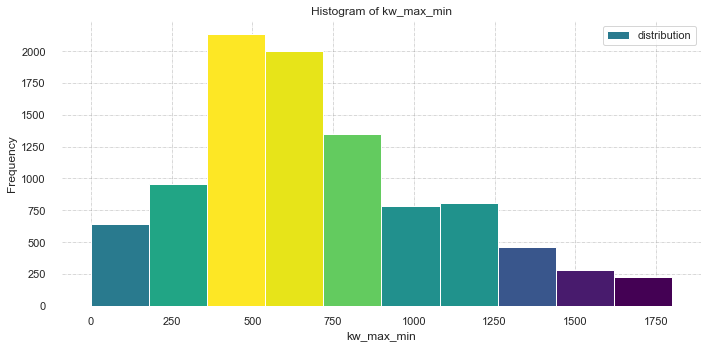

In [116]:
Uni_Histogram('kw_max_min', df2)

g) kw_avg_max : Best keyword (avg. shares)

count     38463.000000
mean     255215.159411
std      131821.240188
min           0.000000
25%      171300.000000
50%      242080.000000
75%      326879.464285
max      843300.000000
Name: kw_avg_max, dtype: float64


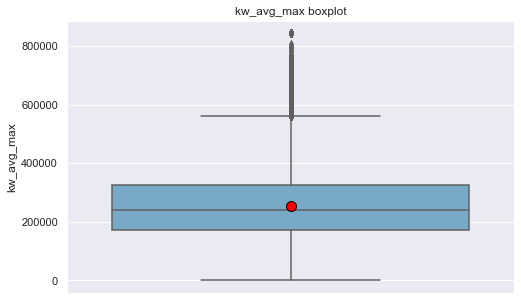

In [117]:
Uni_boxplot('kw_avg_max', df)

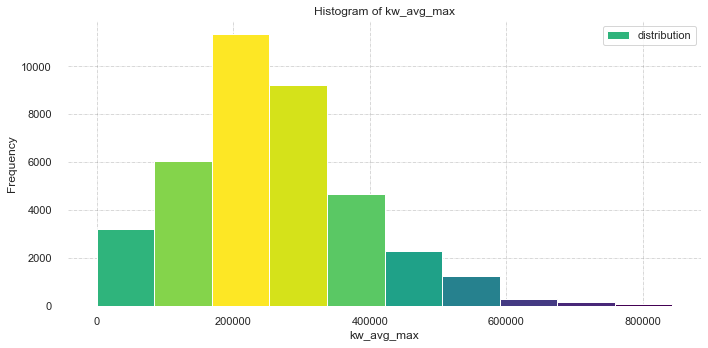

In [118]:
Uni_Histogram('kw_avg_max', df)

h) kw_max_avg: Avg keyword (max. shares)

With outliers :

count     38463.000000
mean       5603.782810
std        6096.725673
min           0.000000
25%        3549.290325
50%        4311.457071
75%        5962.421633
max      298400.000000
Name: kw_max_avg, dtype: float64


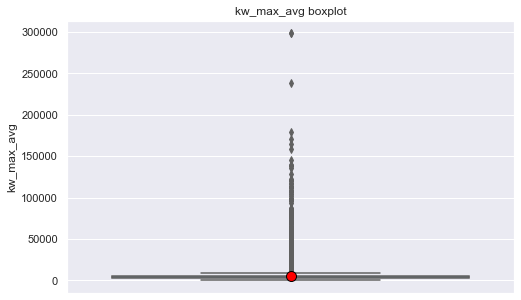

In [119]:
Uni_boxplot('kw_max_avg', df)

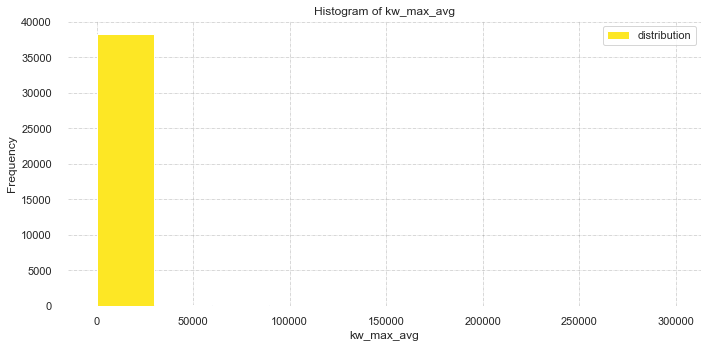

In [120]:
Uni_Histogram('kw_max_avg', df)

Without outliers :

count    9648.000000
mean     4334.927678
std      1307.911779
min      1953.144444
25%      3470.212122
50%      3815.799917
75%      4827.189018
max      9578.000000
Name: kw_max_avg, dtype: float64


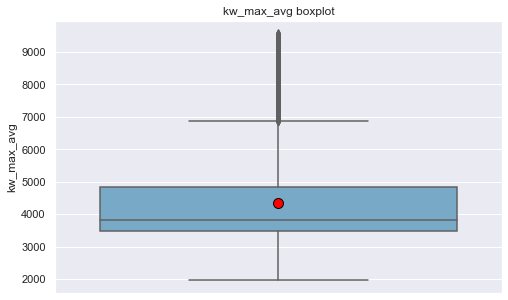

In [121]:
Uni_boxplot('kw_max_avg', df2)

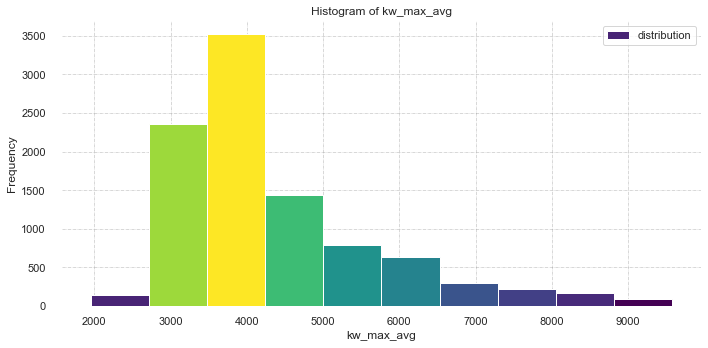

In [122]:
Uni_Histogram('kw_max_avg', df2)

i) global_subjectivity : Text subjectivity

count    38463.000000
mean         0.456984
std          0.088386
min          0.000000
25%          0.402457
50%          0.456566
75%          0.510305
max          1.000000
Name: global_subjectivity, dtype: float64


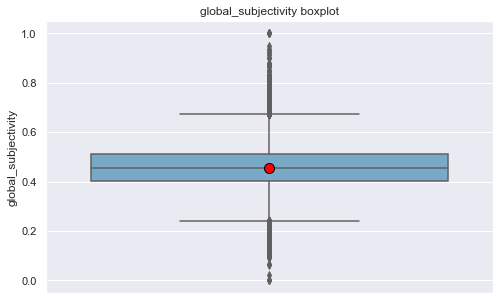

In [123]:
Uni_boxplot('global_subjectivity', df)

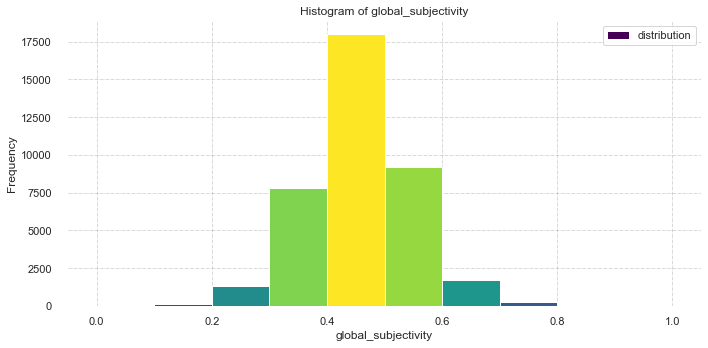

In [124]:
Uni_Histogram('global_subjectivity', df)

# III) Modeling

- Pre-Processing
- Choose the best model and Predictions
- Configuration of our best model for the API tranformation

### 1) Pre-Processing

### Standardization

Before standardizing our dataset, we will check distribution of attributes to decide the method of scaling :
- Robust Scaler (robust to outliers => okay because our dataset contains many outliers)
Robust scaling is one of the best scaling techniques when we have outliers present in our dataset. It scales the data accordingly to the interquartile range)
- Standard Scaler (assumes data is normally distributed within each feature => 
- Min-Max scaler and Max abs scaler (sensitive to outliers => no)
- Box-Cox (A Box cox transformation is defined as a way to transform non-normal dependent variables in our data to a normal shape. We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values)

In [125]:
from copy import copy
data = copy(df)
data

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,weekdays,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,Monday,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,Monday,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,Monday,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,Monday,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,Monday,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38458,11.0,346.0,0.529052,9.0,7.0,1.0,1.0,4.523121,8.0,Wednesday,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Popular
38459,12.0,328.0,0.696296,9.0,7.0,3.0,48.0,4.405488,7.0,Wednesday,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Popular
38460,10.0,442.0,0.516355,24.0,1.0,12.0,1.0,5.076923,8.0,Wednesday,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Popular
38461,6.0,682.0,0.539493,10.0,1.0,1.0,0.0,4.975073,5.0,Wednesday,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Unpopular


In [126]:
data_used = data[['n_tokens_title', 'n_tokens_content', 'average_token_length', 'global_rate_negative_words', 'kw_min_avg', 'num_self_hrefs', 'n_unique_tokens', 'kw_max_min', 'num_hrefs', 'kw_avg_max', 'kw_max_avg', 'global_subjectivity', 'rate_positive_words','title_sentiment_polarity', 'self_reference_min_shares', 'avg_positive_polarity', 'popularity']]
#data_used = copy(data)
data_used

,n_tokens_title,n_tokens_content,average_token_length,global_rate_negative_words,kw_min_avg,num_self_hrefs,n_unique_tokens,kw_max_min,num_hrefs,kw_avg_max,kw_max_avg,global_subjectivity,rate_positive_words,title_sentiment_polarity,self_reference_min_shares,avg_positive_polarity,popularity
0,12.0,219.0,4.680365,0.013699,0.000000,2.0,0.663594,0.0,4.0,0.000000,0.000000,0.521617,0.769231,-0.187500,496.0,0.378636,Unpopular
1,9.0,255.0,4.913725,0.015686,0.000000,1.0,0.604743,0.0,3.0,0.000000,0.000000,0.341246,0.733333,0.000000,0.0,0.286915,Unpopular
2,9.0,211.0,4.393365,0.009479,0.000000,1.0,0.575130,0.0,3.0,0.000000,0.000000,0.702222,0.857143,0.000000,918.0,0.495833,Popular
3,9.0,531.0,4.404896,0.020716,0.000000,0.0,0.503788,0.0,9.0,0.000000,0.000000,0.429850,0.666667,0.000000,0.0,0.385965,Unpopular
4,13.0,1072.0,4.682836,0.012127,0.000000,19.0,0.415646,0.0,19.0,0.000000,0.000000,0.513502,0.860215,0.136364,545.0,0.411127,Unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38458,11.0,346.0,4.523121,0.014451,2514.742857,7.0,0.529052,671.0,9.0,374962.500000,4004.342857,0.482679,0.722222,0.000000,11400.0,0.333791,Popular
38459,12.0,328.0,4.405488,0.009146,1664.267857,7.0,0.696296,616.0,9.0,192985.714286,5470.168651,0.564374,0.812500,1.000000,2100.0,0.374825,Popular
38460,10.0,442.0,5.076923,0.024887,1753.882353,1.0,0.516355,691.0,24.0,295850.000000,6880.687034,0.510296,0.576923,0.136364,1400.0,0.307273,Popular
38461,6.0,682.0,4.975073,0.023460,0.000000,1.0,0.539493,0.0,10.0,254600.000000,3384.316871,0.358578,0.466667,0.000000,452.0,0.236851,Unpopular


In [127]:
X = data_used.drop("popularity", axis=1)
y = data_used["popularity"]

In [128]:
# #applying log transformation 
for col in X.iloc[:,:-1].columns:
    temp = X[X[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        X[col] = np.log(X[col])
        print (col)

X

n_tokens_title
n_tokens_content
average_token_length
n_unique_tokens


,n_tokens_title,n_tokens_content,average_token_length,global_rate_negative_words,kw_min_avg,num_self_hrefs,n_unique_tokens,kw_max_min,num_hrefs,kw_avg_max,kw_max_avg,global_subjectivity,rate_positive_words,title_sentiment_polarity,self_reference_min_shares,avg_positive_polarity
0,2.484907,5.389072,1.543376,0.013699,0.000000,2.0,-0.410084,0.0,4.0,0.000000,0.000000,0.521617,0.769231,-0.187500,496.0,0.378636
1,2.197225,5.541264,1.592032,0.015686,0.000000,1.0,-0.502952,0.0,3.0,0.000000,0.000000,0.341246,0.733333,0.000000,0.0,0.286915
2,2.197225,5.351858,1.480095,0.009479,0.000000,1.0,-0.553160,0.0,3.0,0.000000,0.000000,0.702222,0.857143,0.000000,918.0,0.495833
3,2.197225,6.274762,1.482717,0.020716,0.000000,0.0,-0.685600,0.0,9.0,0.000000,0.000000,0.429850,0.666667,0.000000,0.0,0.385965
4,2.564949,6.977281,1.543904,0.012127,0.000000,19.0,-0.877922,0.0,19.0,0.000000,0.000000,0.513502,0.860215,0.136364,545.0,0.411127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38458,2.397895,5.846439,1.509202,0.014451,2514.742857,7.0,-0.636669,671.0,9.0,374962.500000,4004.342857,0.482679,0.722222,0.000000,11400.0,0.333791
38459,2.484907,5.793014,1.482851,0.009146,1664.267857,7.0,-0.361980,616.0,9.0,192985.714286,5470.168651,0.564374,0.812500,1.000000,2100.0,0.374825
38460,2.302585,6.091310,1.624705,0.024887,1753.882353,1.0,-0.660960,691.0,24.0,295850.000000,6880.687034,0.510296,0.576923,0.136364,1400.0,0.307273
38461,1.791759,6.525030,1.604440,0.023460,0.000000,1.0,-0.617125,0.0,10.0,254600.000000,3384.316871,0.358578,0.466667,0.000000,452.0,0.236851


In [129]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()

X = scaler.fit_transform(X)

In [130]:
y_encode = copy(y)
from sklearn.preprocessing import LabelEncoder
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
y_encode= label_encoder.fit_transform(data_used['popularity'])
y_encode

array([1, 1, 0, ..., 0, 1, 1])

### Splitting the data for Training and Testing

In [131]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y_encode, test_size=0.3)

### 2) Choose the best model and Predictions

### Random Forest Classifier


[0 0 1 ... 1 1 0]
[1 1 1 ... 0 1 1]
The accuracy of the model is:  0.6190311118814456
F1 Score: 0.658
[[2910 2664]
 [1732 4233]]


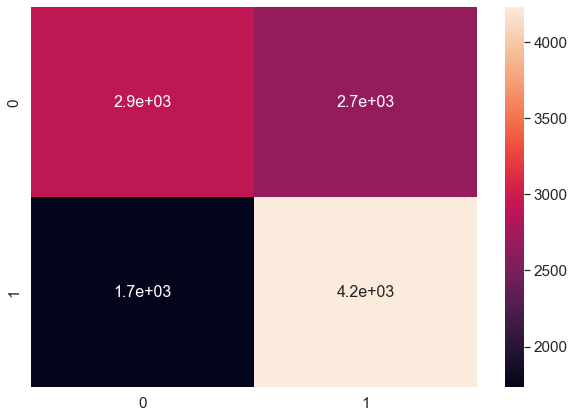

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score, f1_score
from time import time

from sklearn.ensemble import RandomForestClassifier

# Train a single random forest classifier
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 100, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

print(y_test)
print(y_pred)
#Accuracy
print("The accuracy of the model is: ", accuracy_score(y_test, y_pred))
#print("AUC:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Create a confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix For Random Forest')


#After the label Encoder , we have: 0:High, 1:Low, 2:Medium, 3:very high

Change parameters

[1 1 0 ... 0 1 1]
The accuracy of the model is:  0.640696767484184
F1 Score: 0.651
[[3532 2042]
 [2104 3861]]


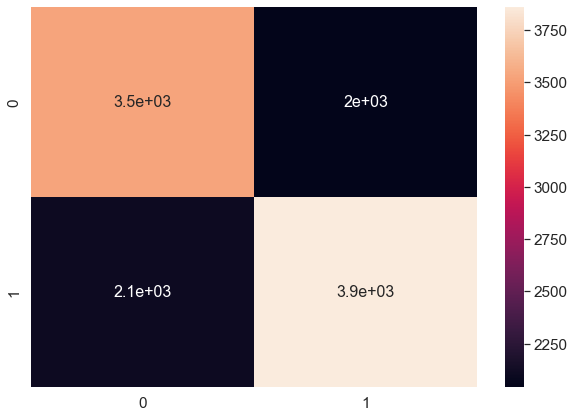

Best: [0.61365341 0.61499037 0.61402475 0.63122123 0.63200105 0.63200111
 0.63144396 0.63382106 0.63560386], using {'max_depth': 16, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.111336,0.095606,0.033840,0.003832,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.601857,0.611328,0.615785,0.621170,0.618128,0.613653,0.006717,9
1,2.500615,0.559342,0.077003,0.005140,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.610771,0.610956,0.614299,0.623213,0.615713,0.614990,0.004532,7
2,4.948881,0.290824,0.158011,0.014706,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.604085,0.610399,0.616156,0.623027,0.616456,0.614025,0.006379,8
3,3.767705,0.282811,0.072236,0.016071,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.626370,0.629898,0.629712,0.638626,0.631501,0.631221,0.004061,6
4,7.251377,0.590005,0.138188,0.035157,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.624884,0.632312,0.634355,0.640297,0.628158,0.632001,0.005289,4
5,13.376629,0.888131,0.238783,0.073986,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.623955,0.630269,0.637326,0.638440,0.630015,0.632001,0.005320,3
6,5.862120,0.745861,0.104373,0.021346,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.630641,0.630084,0.633426,0.634355,0.628715,0.631444,0.002114,5
7,10.880133,0.897930,0.204801,0.048935,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.631569,0.634169,0.636397,0.634912,0.632058,0.633821,0.001796,2
8,23.794936,1.207752,0.414245,0.065560,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.626741,0.637697,0.641040,0.638626,0.633915,0.635604,0.004989,1


In [133]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)


y_pred1 = grid_results.predict(X_test)
y_prob1 = grid_results.predict_proba(X_test)
print(y_pred1)
#Accuracy
print("The accuracy of the model is: ", accuracy_score(y_test, y_pred1))
#print("AUC:", roc_auc_score(y_test,y_prob1, multi_class='ovr'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred1))

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred1)

print(cnf_matrix)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

### AdaBoostClassifier

[1 1 0 ... 0 1 0]
The accuracy of the model is:  0.5836727619377763
F1 Score: 0.529
[[4039 1535]
 [3269 2696]]


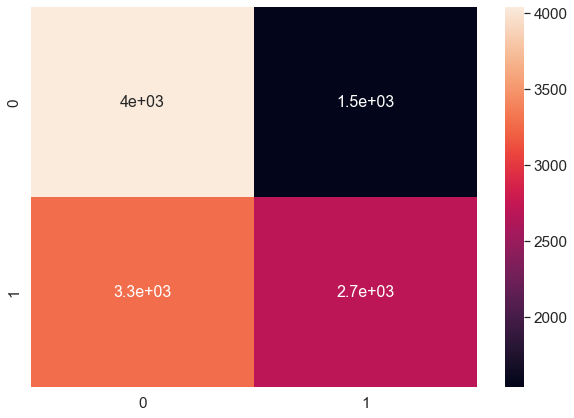

In [134]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer with 1 stump trees
ABC = AdaBoostClassifier(n_estimators=2)
# Train Adaboost Classifer
model = ABC.fit(X_train, y_train)

y_pred2 = model.predict(X_test)

y_prob2 = grid_results.predict_proba(X_test)
print(y_pred2)
#Accuracy
print("The accuracy of the model is: ", accuracy_score(y_test, y_pred2))
#print("AUC:", roc_auc_score(y_test,y_prob2, multi_class='ovr'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred2))

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred2)

print(cnf_matrix)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


Change parameters

[0 1 0 ... 0 1 1]
The accuracy of the model is:  0.6278706993673628
F1 Score: 0.642
[[3391 2183]
 [2111 3854]]


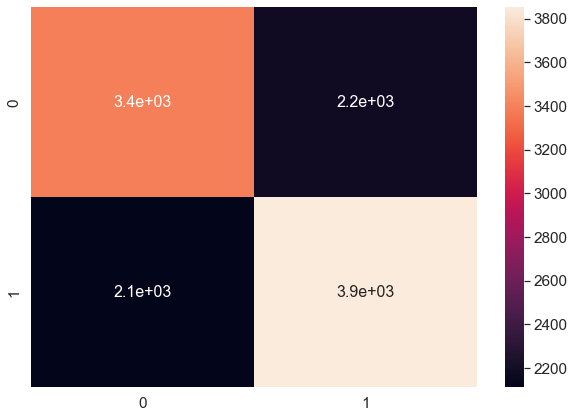

The best estimator returned by GridSearch CV is: AdaBoostClassifier(n_estimators=49)


In [136]:
from sklearn.ensemble import AdaBoostClassifier

# initializing the model
model=AdaBoostClassifier()

# applying GridSearchCV
grid=GridSearchCV(estimator=model,param_grid={'n_estimators':range(1,50)})

# training the model
grid_fit = grid.fit(X_train,y_train)

y_pred3 = grid_fit.predict(X_test)
y_prob3 = grid_results.predict_proba(X_test)
print(y_pred3)
#Accuracy
print("The accuracy of the model is: ", accuracy_score(y_test, y_pred3))
#print("AUC:", roc_auc_score(y_test,y_prob3, multi_class='ovr'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred3))

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred3)

print(cnf_matrix)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# printing the best estimator
print("The best estimator returned by GridSearch CV is:", grid.best_estimator_)

### Decision tree classifier

The accuracy of the model is:   0.5567206863679695
[1 1 1 ... 0 0 1]
F1 Score: 0.566
[[3083 2491]
 [2624 3341]]


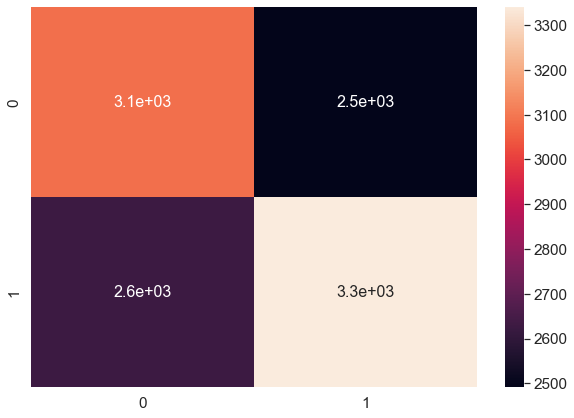

In [137]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree_result = decision_tree.fit(X_train, y_train)

y_pred4 = decision_tree_result.predict(X_test)
y_prob4 = grid_results.predict_proba(X_test)
print("The accuracy of the model is:  ", accuracy_score(y_test, y_pred4))
print(y_pred4)
#Accuracy
#print("AUC:", roc_auc_score(y_test,y_prob4, multi_class='ovr'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred4))


# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred4)

print(cnf_matrix)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Change parameters

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\edupro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan 0.58282663 0.58282663 0.58282663 0.58282663 0.58282663
 0.58282663 0.58282663 0.58282663        nan 0.58282663 0.58282663
 0.58282663 0.58282663 0.58282663 0.58282663 0.58282663 0.58282663
        nan 0.58282663 0.58282663 0.58282663 0.58282663 0.58282663
 0.58282663 0.58282663 0.58282663        nan 0.58282663 0.58282663
 0.58282663 0.58282663 0.58282663 0.58282663 0.58282663 0.58282663
        nan 0.58869459 0.58869459 0.58869459 0.58869459 0.58869459
 0.58869459 0.58869459 0.58869459        nan 0.58869459 0.58869459
 0.58869459 0.58869459 0.58869459 0.58869459 0.58869459 0.58869459
        nan 0.58869459 0.58869459 0.58869459 0.58869459 0.58869459
 0.58869459 0.58869459 0.58869459        nan 0.58869459 0.58869459
 0.58869459 0.58869459 0.58869459 0.58869459 0.58869459 0.58869459
        nan 0.60240045 0.60240045 0.60240045 0.60240

The accuracy of the model is:   0.6117514515989254
[1 1 0 ... 0 1 1]
F1 Score: 0.630
[[3252 2322]
 [2158 3807]]


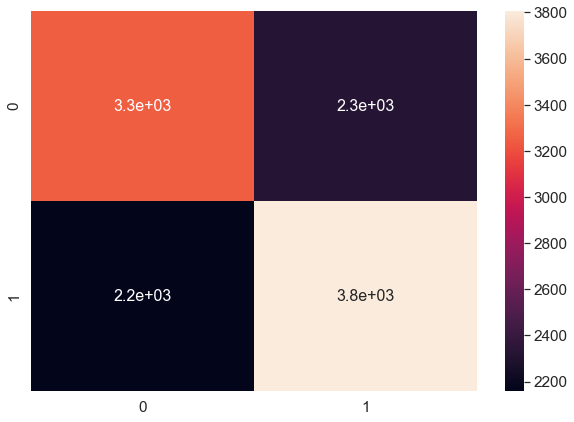

Best parameters of the model are: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best estimator of the model are: DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=8)
Best scores of the model are: 0.6148052101397659


In [138]:
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range( 1,5)
}


grid = GridSearchCV(decision_tree, param_grid = params, cv=10, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

y_pred5 = grid_result.predict(X_test)
y_prob5 = grid_results.predict_proba(X_test)
print("The accuracy of the model is:  ", accuracy_score(y_test, y_pred5))
print(y_pred5)
#Accuracy
#print("AUC:", roc_auc_score(y_test,y_prob5, multi_class='ovr'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred5))
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred5)

print(cnf_matrix)

df_cm = pd.DataFrame(cnf_matrix, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

print("Best parameters of the model are:", grid.best_params_)
print("Best estimator of the model are:", grid.best_estimator_)
print("Best scores of the model are:", grid.best_score_)

### Importance of model

In [139]:
import pandas as pd
import numpy as np
lst1 = ["Random Forest Classifier","AdaBoost Classifier","Decision Tree Classifier"]
lst2 = [63.64, 62.74, 61.14]
ML_compare = pd.DataFrame(list(zip(lst1,lst2)), columns = ['MLA_used','Train Accuracy'])
print(ML_compare)

                   MLA_used  Train Accuracy
0  Random Forest Classifier           63.64
1       AdaBoost Classifier           62.74
2  Decision Tree Classifier           61.14


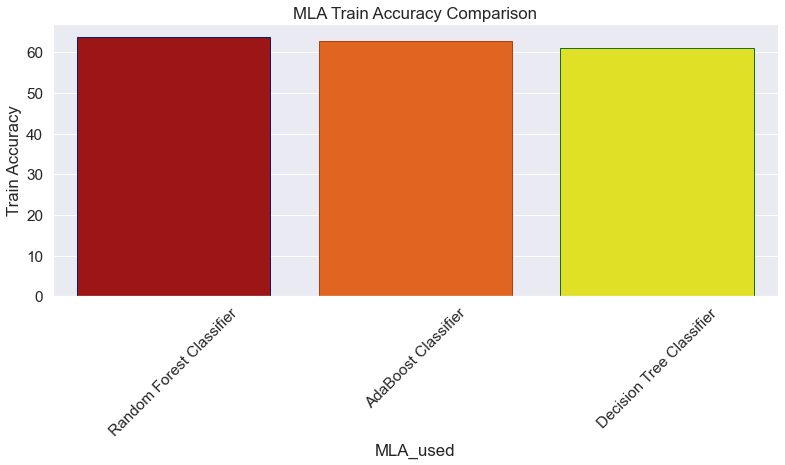

In [140]:
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA_used", y="Train Accuracy",data=ML_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('MLA Train Accuracy Comparison')
plt.show()
# According to the barplot our best model is the Random Forest Classifier

### 3) Configuration of our best model for the API tranformation

In [141]:
sample_for_api = data_used.drop("popularity", axis=1)
sample_for_api.shape

(38463, 16)

In [142]:
# Save our optimized dataset on csv file
sample_for_api.to_csv('data_onp.csv')

In [143]:
pip install joblib

In [144]:
# Save our predictive model on a pkl file 
import joblib
joblib.dump(clf, 'rd_forest_clf.pkl.pkl')

['rd_forest_clf.pkl.pkl']

In [145]:
# Selection of an article to predict
sample_for_api.iloc[0]

n_tokens_title                 12.000000
n_tokens_content              219.000000
average_token_length            4.680365
global_rate_negative_words      0.013699
kw_min_avg                      0.000000
num_self_hrefs                  2.000000
n_unique_tokens                 0.663594
kw_max_min                      0.000000
num_hrefs                       4.000000
kw_avg_max                      0.000000
kw_max_avg                      0.000000
global_subjectivity             0.521617
rate_positive_words             0.769231
title_sentiment_polarity       -0.187500
self_reference_min_shares     496.000000
avg_positive_polarity           0.378636
Name: 0, dtype: float64

In [146]:
# Convertion of the article information to a json API
X_json = sample_for_api.iloc[0].to_json()
X_json

'{"n_tokens_title":12.0,"n_tokens_content":219.0,"average_token_length":4.6803652968,"global_rate_negative_words":0.0136986301,"kw_min_avg":0.0,"num_self_hrefs":2.0,"n_unique_tokens":0.663594467,"kw_max_min":0.0,"num_hrefs":4.0,"kw_avg_max":0.0,"kw_max_avg":0.0,"global_subjectivity":0.5216171455,"rate_positive_words":0.7692307692,"title_sentiment_polarity":-0.1875,"self_reference_min_shares":496.0,"avg_positive_polarity":0.3786363636}'

The outup below will permit us to compose our post request for the API part

### Thanks for reading :)